# Import libraries

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Read data from Excel file using pandas function

In [2]:
df=pd.read_excel("marketing_campaign.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.fillna(0,inplace=True)

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.shape

(2240, 29)

In [8]:
df['Dt_Customer']=pd.to_datetime(df["Dt_Customer"])
df["Dt_Customer"]

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [9]:
df["Year"]=df["Dt_Customer"].dt.year
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year'],
      dtype='object')

In [10]:
df["Age"]=2024-df["Year_Birth"]
def get_age_group(Age):
    if Age <= 25:
        return 'Teenager'
    elif Age <= 45:
        return 'Young adult'
    elif Age <= 55:
        return 'middle-aged'
    else:
        return 'old'

# Assign each customer to their corresponding age group
df['Age_Group'] = df['Age'].apply(get_age_group)

In [11]:
df['Age_Group']

0               old
1               old
2               old
3       Young adult
4       Young adult
           ...     
2235            old
2236            old
2237    Young adult
2238            old
2239            old
Name: Age_Group, Length: 2240, dtype: object

In [12]:
spending_columns = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',]
df['Total_Spending']=df[spending_columns].sum(axis=1)


In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Age', 'Age_Group', 'Total_Spending'],
      dtype='object')

# 1)How does customer spending vary across different age groups?

Average Customer Spending by Age Group Age_Group
Young adult    564.054507
middle-aged    536.324538
old            678.009950
Name: Total_Spending, dtype: float64


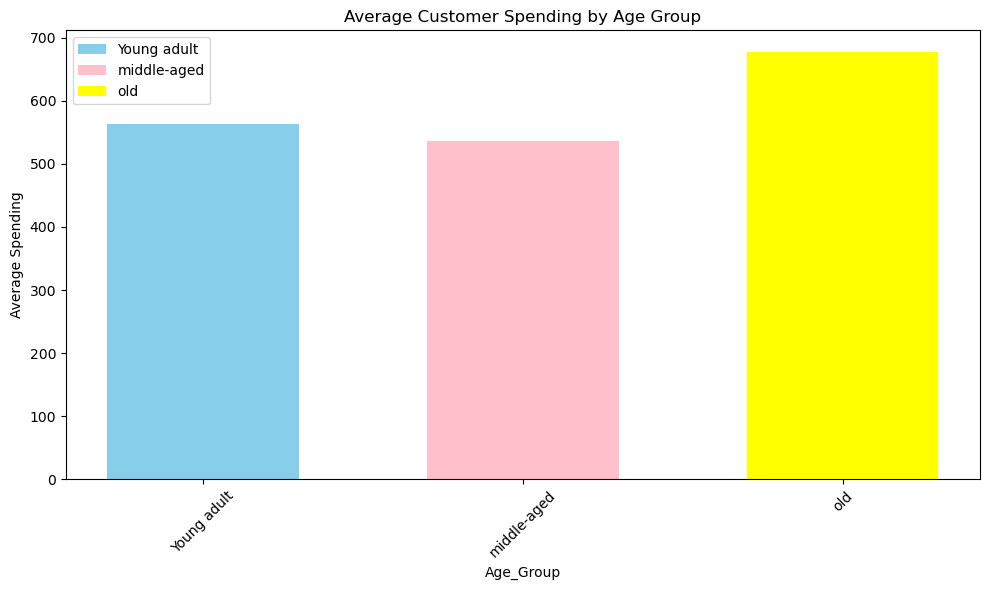

In [14]:
avg_spending_by_age = df.groupby('Age_Group')['Total_Spending'].mean()
print("Average Customer Spending by Age Group",avg_spending_by_age )
plt.figure(figsize=(10, 6))
plt.bar(avg_spending_by_age.index,avg_spending_by_age.values,color=['skyblue','pink','yellow'],width=0.6,label=avg_spending_by_age.index)
plt.title('Average Customer Spending by Age Group')
plt.xlabel('Age_Group')
plt.ylabel('Average Spending')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2)calculate the average spending for each education level

Average Customer Spending by Education Level Education
2n Cycle      496.527094
Basic          81.796296
Graduation    619.898846
Master        611.781081
PhD           672.409465
Name: Total_Spending, dtype: float64


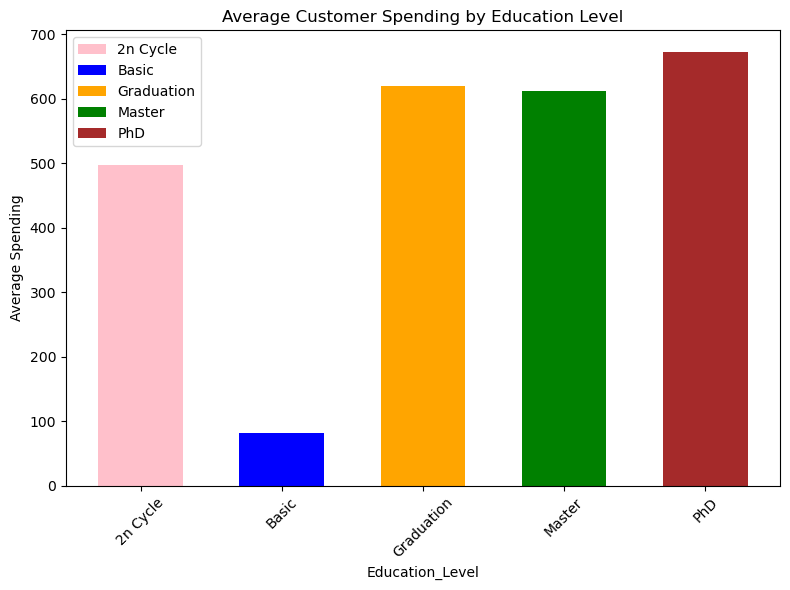

In [15]:
avg_spending_by_education = df.groupby('Education')['Total_Spending'].mean()
print('Average Customer Spending by Education Level',avg_spending_by_education)
plt.figure(figsize=(8,6))
plt.bar(avg_spending_by_education.index,avg_spending_by_education.values,color=['pink','blue','orange','green','brown'],width=0.6,label=avg_spending_by_education.index)
plt.title('Average Customer Spending by Education Level')
plt.xlabel('Education_Level')
plt.ylabel('Average Spending')
plt.legend(loc='best')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3)find the average spending for each marital status

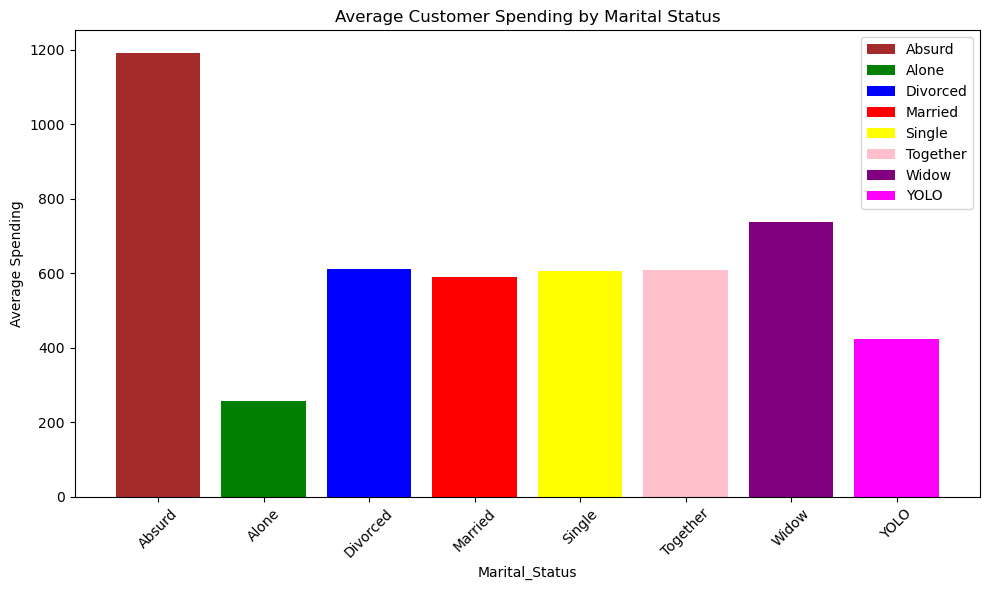

In [16]:
avg_spending_by_MaritalS = df.groupby('Marital_Status')['Total_Spending'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_spending_by_MaritalS.index,avg_spending_by_MaritalS.values,color=['brown','green','blue','red','yellow','pink','purple','magenta'],label=avg_spending_by_MaritalS.index)
plt.title('Average Customer Spending by Marital Status')
plt.xlabel('Marital_Status')
plt.ylabel('Average Spending')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Age', 'Age_Group', 'Total_Spending'],
      dtype='object')

In [18]:
df['Year'] = df['Year'].astype('Int64')
df.Year

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Year, Length: 2240, dtype: Int64

# 4)number of customers who made purchases or visits in each year, categorized by the different purchase types.

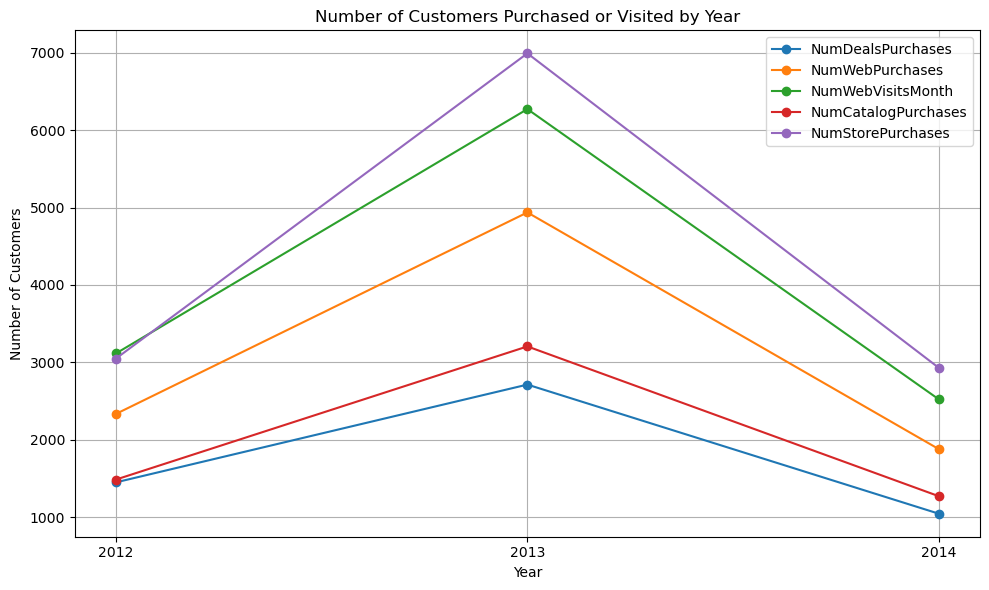

In [42]:

grouped_data = df.groupby(['Year'])[['NumDealsPurchases','NumWebPurchases', 'NumWebVisitsMonth', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
# Plot the line plots for each purchase category
grouped_data
years_to_include = [2012,2013,2014]#define a list named years_to_include containing the years that i want to include on the x-axis of your plot. 
plt.figure(figsize=(10,6))
plt.plot(grouped_data.index, grouped_data['NumDealsPurchases'], marker='o', label='NumDealsPurchases')
plt.plot(grouped_data.index, grouped_data['NumWebPurchases'], marker='o', label='NumWebPurchases')
plt.plot(grouped_data.index, grouped_data['NumWebVisitsMonth'], marker='o', label='NumWebVisitsMonth')
plt.plot(grouped_data.index, grouped_data['NumCatalogPurchases'], marker='o', label='NumCatalogPurchases')
plt.plot(grouped_data.index, grouped_data['NumStorePurchases'], marker='o', label='NumStorePurchases')

plt.title('Number of Customers Purchased or Visited by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
# formatter = ticker.StrMethodFormatter("{x:.0f}")
# plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.xticks(years_to_include)
plt.show()

# 5)counts accepted campaigns and rejected campaigns values

AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
dtype: int64
 
AcceptedCmp1    2096
AcceptedCmp2    2210
AcceptedCmp3    2077
AcceptedCmp4    2073
AcceptedCmp5    2077
dtype: int64


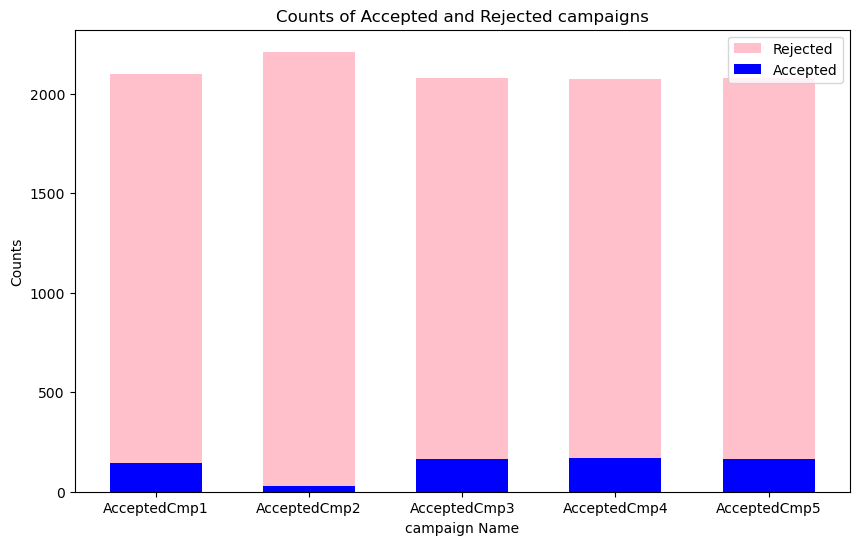

In [20]:
Acc=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]
count_acc=df[Acc].sum()
count_reject=df[Acc].eq(0).sum()

print(count_acc)
print(" ")
print(count_reject)
colors=["pink","Blue"]
plt.figure(figsize=(10,6))
x_ticks=np.arange(len(Acc))
plt.bar(Acc,count_reject,color=colors[0],label='Rejected',width=0.6)
plt.bar(Acc,count_acc,color=colors[1], label='Accepted',width=0.6)
plt.xlabel("campaign Name")
plt.ylabel("Counts")
plt.title("Counts of Accepted and Rejected campaigns")
plt.legend()
plt.show()

# 6)overall complaint distribution

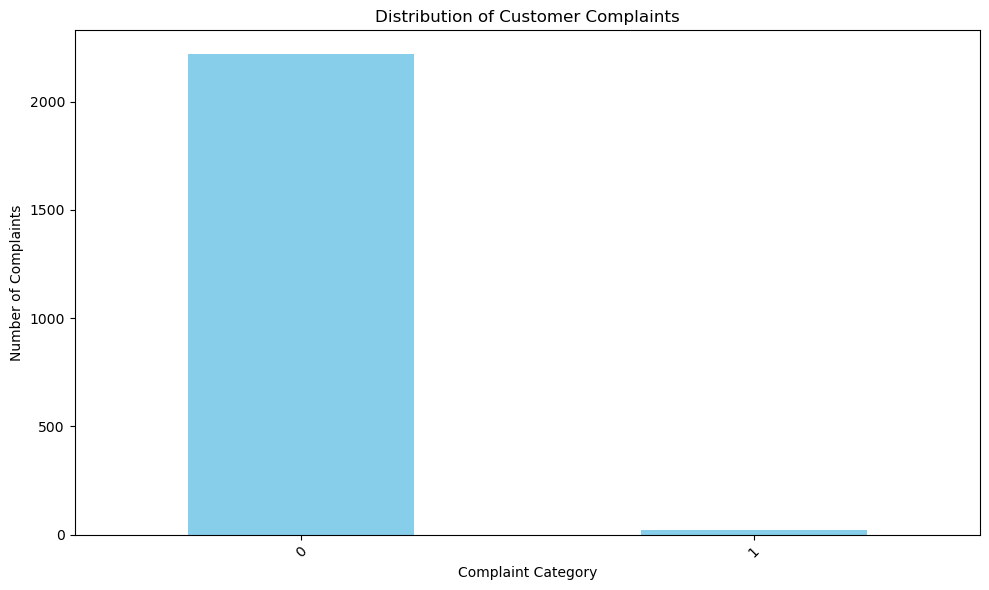

In [21]:
complaint_counts = df.groupby('Complain').size()

# Plot the bar chart for overall complaint distribution
plt.figure(figsize=(10, 6))
complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Complaints')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 7)Distribution of Customer Complaints Across Segments(education level)

<Figure size 1000x600 with 0 Axes>

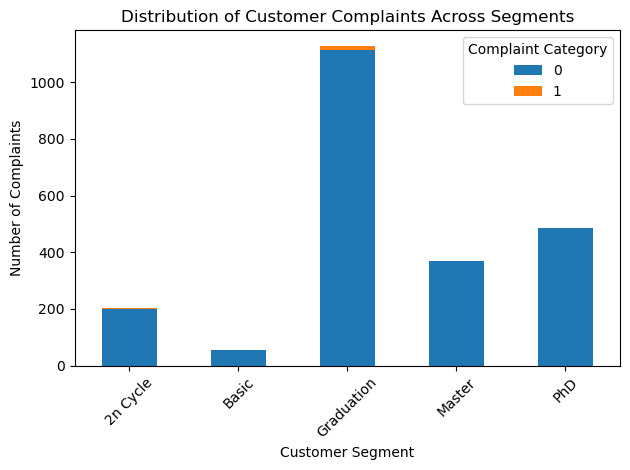

In [22]:
plt.figure(figsize=(10, 6))
segment_complaint_counts = df.groupby(['Education', 'Complain']).size().unstack()
segment_complaint_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Customer Complaints Across Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Complaint Category')
plt.tight_layout()
plt.show()
#0 means no complaint
#1 means complaint

# 8)Calculate the number of customers in each age group

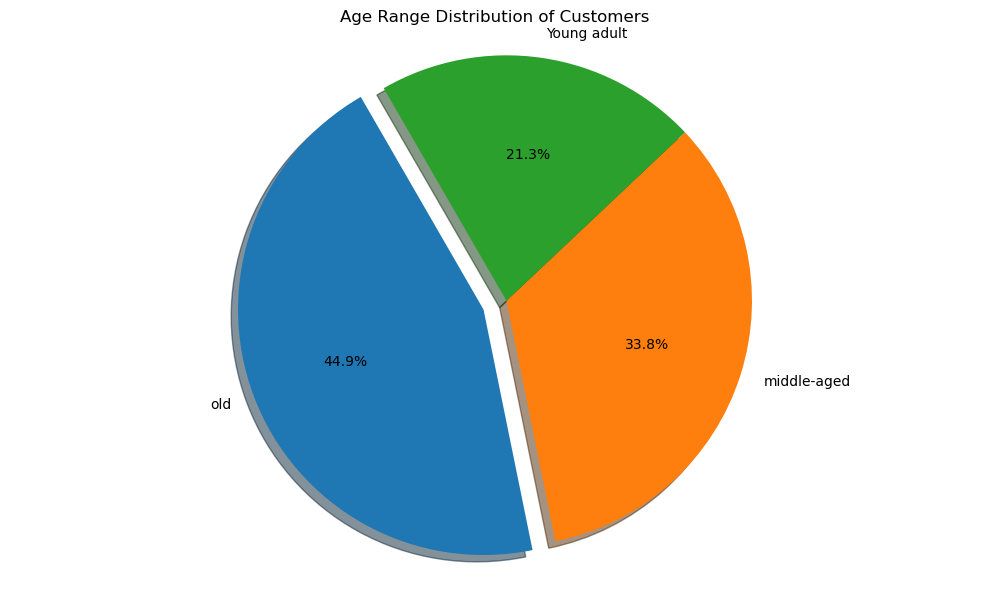

In [23]:

customer_count = df['Age_Group'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(customer_count, labels=customer_count.index, autopct='%1.1f%%', startangle=120,shadow=True,explode=[0.1,0,0])
plt.title('Age Range Distribution of Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# 9)Income Distribution by Education Level

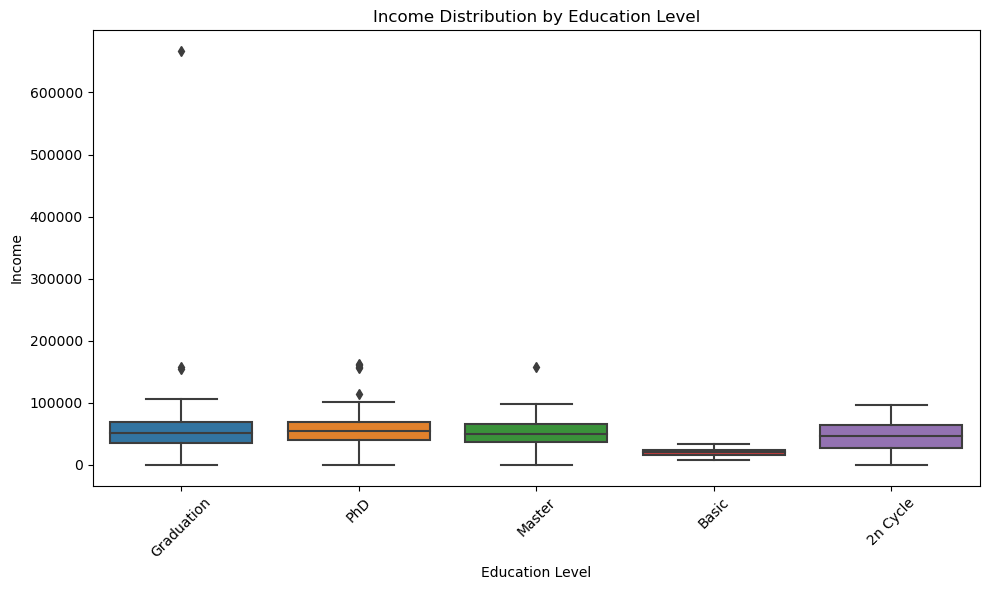

In [49]:
# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10)Customer Web Visits vs. Purchases by Education Level

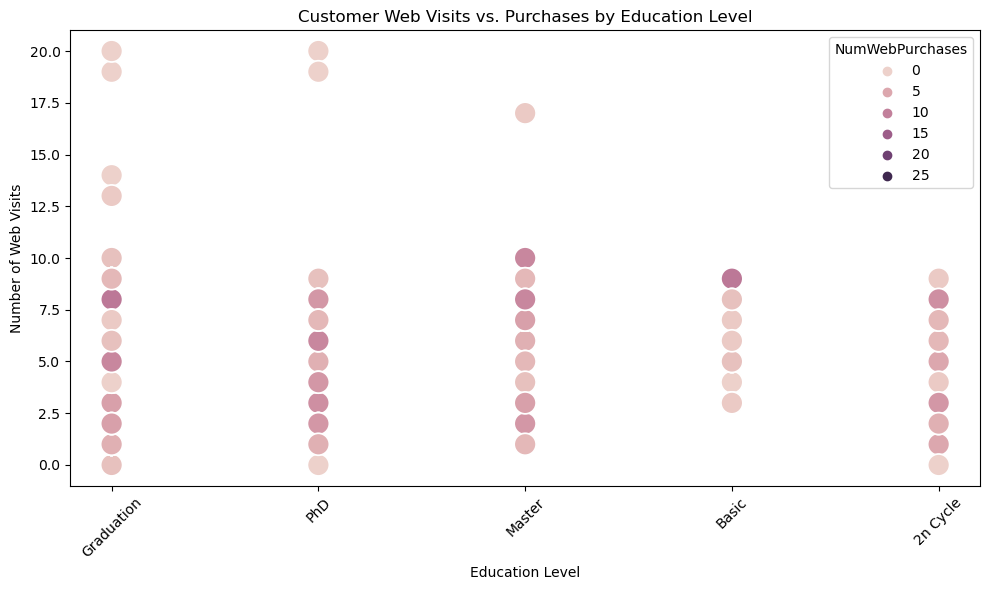

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education', y='NumWebVisitsMonth', data=df,s=250, hue='NumWebPurchases')#hue=(color) of the points
plt.title('Customer Web Visits vs. Purchases by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Web Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Age', 'Age_Group', 'Total_Spending'],
      dtype='object')

# 11)Do specific campaigns or promotions perform better at certain times of the year?

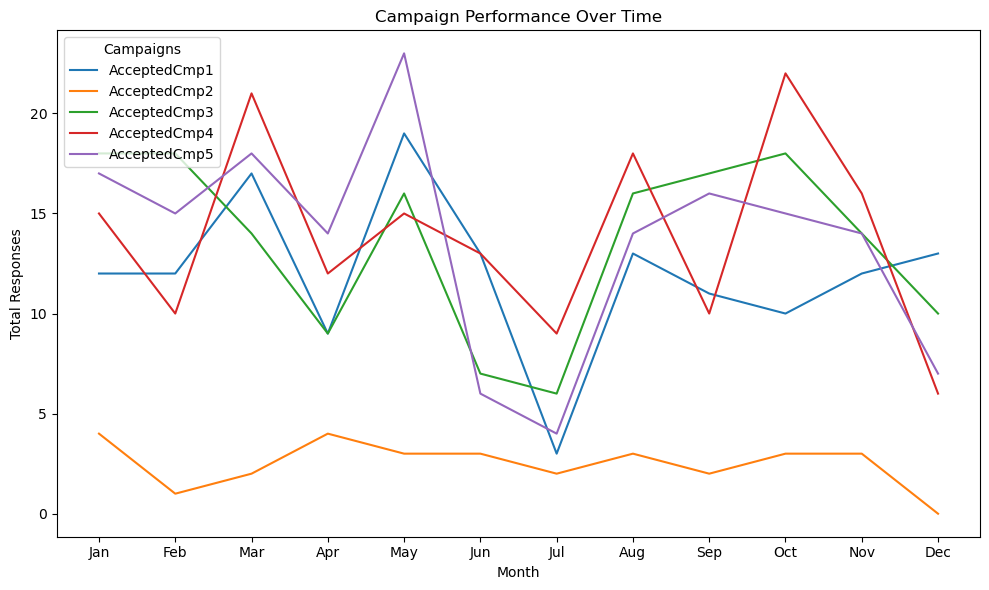

In [27]:
df['Month'] = df['Dt_Customer'].dt.month
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_data = df.groupby('Month')[campaign_cols].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=campaign_data, dashes=False)
plt.title('Campaign Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Total Responses')
plt.legend(title='Campaigns', loc='upper left')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()